# Part 1: Python Basics

## Table of Contents
- Time Series
- DataFrames
- Data Cleaning
- Group by

## Time Series

### Setting up the Google stock dataset so that the sample code will run

In [1]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import Pandas and NumPy
import pandas as pd
import numpy as np 

In [5]:
# Use read_csv to read data with index column 0 and parse dates in date time formate
data = pd.read_csv('GOOGL_SuperNotebook.csv',index_col=0, parse_dates=True)
#or use the following two lines
#data = pd.read_csv('GOOGL.csv',index_col=0)
#data.index = data.index.astype('datetime64[ns]') #ns: nano second-based time format

In [7]:
# Check data, the first two rows
data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343


### Take a DataFrame and turn it into a Series

In [9]:
# Use this formula: DataFrame.column_name

# Create the Series from 'Volume"
data.Volume


# Now create a Series for the remaining columns
data.Open
data.High
data.Low
data.Close
data['Adj Close']

# Save the Series to variables
stock_open = data.Open
stock_high = data.High
stock_low = data.Low
stock_close = data.Close
stock_adj_close = data['Adj Close']
stock_volume = data.Volume


# Alternate method, as seen above with 'Adj Close': DataFrame ['column_name']
data['Close']

Date
2004-08-19    44659096
2004-08-20    22834343
2004-08-23    18256126
2004-08-24    15247337
2004-08-25     9188602
                ...   
2022-01-10     2220400
2022-01-11     1436500
2022-01-12     1305400
2022-01-13     1571800
2022-01-14     1482100
Name: Volume, Length: 4384, dtype: int64

Date
2004-08-19      50.050049
2004-08-20      50.555557
2004-08-23      55.430431
2004-08-24      55.675674
2004-08-25      52.532532
                 ...     
2022-01-10    2701.560059
2022-01-11    2760.139893
2022-01-12    2823.000000
2022-01-13    2830.800049
2022-01-14    2741.580078
Name: Open, Length: 4384, dtype: float64

Date
2004-08-19      52.082081
2004-08-20      54.594597
2004-08-23      56.796799
2004-08-24      55.855858
2004-08-25      54.054054
                 ...     
2022-01-10    2776.389893
2022-01-11    2804.320068
2022-01-12    2852.159912
2022-01-13    2857.000000
2022-01-14    2814.840088
Name: High, Length: 4384, dtype: float64

Date
2004-08-19      48.028027
2004-08-20      50.300301
2004-08-23      54.579578
2004-08-24      51.836838
2004-08-25      51.991993
                 ...     
2022-01-10    2663.290039
2022-01-11    2733.850098
2022-01-12    2813.889893
2022-01-13    2768.179932
2022-01-14    2739.969971
Name: Low, Length: 4384, dtype: float64

Date
2004-08-19      50.220219
2004-08-20      54.209209
2004-08-23      54.754753
2004-08-24      52.487488
2004-08-25      53.053055
                 ...     
2022-01-10    2773.389893
2022-01-11    2794.719971
2022-01-12    2828.610107
2022-01-13    2771.739990
2022-01-14    2789.610107
Name: Close, Length: 4384, dtype: float64

Date
2004-08-19      50.220219
2004-08-20      54.209209
2004-08-23      54.754753
2004-08-24      52.487488
2004-08-25      53.053055
                 ...     
2022-01-10    2773.389893
2022-01-11    2794.719971
2022-01-12    2828.610107
2022-01-13    2771.739990
2022-01-14    2789.610107
Name: Adj Close, Length: 4384, dtype: float64

Date
2004-08-19      50.220219
2004-08-20      54.209209
2004-08-23      54.754753
2004-08-24      52.487488
2004-08-25      53.053055
                 ...     
2022-01-10    2773.389893
2022-01-11    2794.719971
2022-01-12    2828.610107
2022-01-13    2771.739990
2022-01-14    2789.610107
Name: Close, Length: 4384, dtype: float64

### Plot the Volume

<Axes: title={'center': 'Google Stock Trading Volume'}, xlabel='Date', ylabel='Volume'>

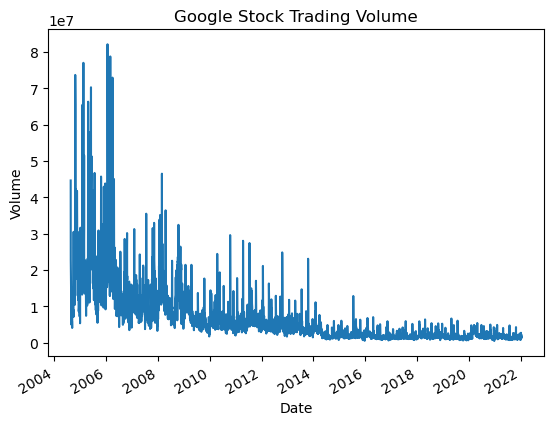

In [11]:
# Plot stock_volume with .plot() and add xlabel, ylabel and title
stock_volume.plot(xlabel='Date', ylabel='Volume', title='Google Stock Trading Volume')

### Aggregation Functions

In [13]:
# Use the variable 'stock_volume' which is the Volume Series 
stock_volume.max()
stock_volume.min()
stock_volume.mean()
stock_volume.median()
stock_volume.nlargest()
stock_volume.nsmallest()
stock_volume.idxmax()
stock_volume.idxmin()

82151167

465600

6492025.509580292

3830533.5

Date
2006-01-20    82151167
2006-02-28    78796325
2005-02-14    77047276
2004-10-22    73710016
2006-03-31    72969757
Name: Volume, dtype: int64

Date
2020-12-24    465600
2015-12-24    520600
2016-11-25    613500
2019-11-29    640100
2019-10-10    642100
Name: Volume, dtype: int64

Timestamp('2006-01-20 00:00:00')

Timestamp('2020-12-24 00:00:00')

### Boolean Mask Filtering

In [15]:
# Filter where High - Low is greater than 10
# Create the Boolean Mask for filtering
data[(data.High - data.Low) > 10]

# Worth noting: This is how you simply find the difference between the two Series
#(data.High - data.Low) # Commented to keep output clean

# Alternate style to the above using variable names assigned above:
data[(stock_high - stock_low) > 10]

# Just in case, here's the formula for a date range Boolean
# DataFrame[(DataFrame.index >= 'YYYY-MM-DD') & (DataFrame.index <= 'YYYY-MM-DD')]
# data[(data.index >= '2004-10-25') & (data.index <= '2004-11-07')] # Commenting to keep the output clean

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-25,88.288284,97.312309,86.361359,93.793793,93.793793,65462872
2005-11-29,212.442444,213.413406,201.271271,201.971970,201.971970,42948608
2005-12-19,216.316315,223.328323,210.265259,212.512512,212.512512,43829726
2006-01-19,225.810806,226.971970,216.716721,218.443436,218.443436,29045525
2006-01-20,219.569565,220.235229,197.567566,199.929932,199.929932,82151167
...,...,...,...,...,...,...
2022-01-10,2701.560059,2776.389893,2663.290039,2773.389893,2773.389893,2220400
2022-01-11,2760.139893,2804.320068,2733.850098,2794.719971,2794.719971,1436500
2022-01-12,2823.000000,2852.159912,2813.889893,2828.610107,2828.610107,1305400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-25,88.288284,97.312309,86.361359,93.793793,93.793793,65462872
2005-11-29,212.442444,213.413406,201.271271,201.971970,201.971970,42948608
2005-12-19,216.316315,223.328323,210.265259,212.512512,212.512512,43829726
2006-01-19,225.810806,226.971970,216.716721,218.443436,218.443436,29045525
2006-01-20,219.569565,220.235229,197.567566,199.929932,199.929932,82151167
...,...,...,...,...,...,...
2022-01-10,2701.560059,2776.389893,2663.290039,2773.389893,2773.389893,2220400
2022-01-11,2760.139893,2804.320068,2733.850098,2794.719971,2794.719971,1436500
2022-01-12,2823.000000,2852.159912,2813.889893,2828.610107,2828.610107,1305400


### Shift and Rolling

In [62]:
# The .shift() function moves data up or down by a specified number of rows

# Move back in time
#data.Volume.shift(1)

# Move forward in time
#data.Volume.shift(-1)

# The .rolling() function calculates a moving window statistic

# Rolling Mean (5-day moving average)
data.Rolling_Mean_5 = data.Close.rolling(window=5).mean()
data.Rolling_Mean_5

# Can also use: .sum(), .median(), .min() and .max() with .rolling()

# Alternative: Using Square Brackets
#data['Rolling_Mean_5_Alt'] = data['Close'].rolling(window=5).mean() # Commented out to clean up output
#data['Rolling_Mean_5_Alt']  

/var/folders/lg/_84pnw6j4xqgnkg8mjxwp8z40000gn/T/ipykernel_91478/3761685083.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Rolling_Mean_5 = data.Close.rolling(window=5).mean()


Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25      52.944945
                 ...     
2022-01-10    2782.433984
2022-01-11    2763.779981
2022-01-12    2778.402002
2022-01-13    2781.760010
2022-01-14    2791.614014
Name: Close, Length: 4384, dtype: float64

### Example: Buy on day x, sell on day x+5

Consider this investment strategy: buy on day x and then sell after 5 days (on day x+5). Find the expected profit (in %) of this operation.

In [65]:
# Check the first 10 rows (stock_close = buy price)
stock_close.head(10)

# Calculate the sell price (shifted 5 days forward) -- REMEMBER: Negative numbers shift forward in time
sell_price = stock_close.shift(-5)
sell_price

# Calculate expected profit in percent
profit_percent = ((sell_price - stock_close) / stock_close) * 100
profit_percent

# Display the first 10 values
profit_percent.head(10)

# For extra precision, calculate the mean profit
profit_percent.mean()

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
2004-08-27    53.128128
2004-08-30    51.056057
2004-08-31    51.236237
2004-09-01    50.175175
Name: Close, dtype: float64

Date
2004-08-19    54.009010
2004-08-20    53.128128
2004-08-23    51.056057
2004-08-24    51.236237
2004-08-25    50.175175
                ...    
2022-01-10          NaN
2022-01-11          NaN
2022-01-12          NaN
2022-01-13          NaN
2022-01-14          NaN
Name: Close, Length: 4384, dtype: float64

Date
2004-08-19    7.544354
2004-08-20   -1.994276
2004-08-23   -6.755023
2004-08-24   -2.383903
2004-08-25   -5.424532
                ...   
2022-01-10         NaN
2022-01-11         NaN
2022-01-12         NaN
2022-01-13         NaN
2022-01-14         NaN
Name: Close, Length: 4384, dtype: float64

Date
2004-08-19    7.544354
2004-08-20   -1.994276
2004-08-23   -6.755023
2004-08-24   -2.383903
2004-08-25   -5.424532
2004-08-26   -5.930872
2004-08-27   -5.784269
2004-08-30   -0.421533
2004-08-31   -0.068379
2004-09-01    2.054865
Name: Close, dtype: float64

0.540424922938213

## DataFrames

### Setting up the Students dataset so that the sample code will run

In [146]:
# Import pandas as pd
import pandas as pd

# Load the dataset ('Students_SuperNotebook.csv' with the actual filename)
data_students = pd.read_csv('Students_SuperNotebook.csv')

# Quick check to confirm it loaded properly
data_students.head()

,Name,hw1,hw2,program
0,Demetria,2.00,4.00,MSIS
1,Dorian,10.00,10.00,MSIS
2,Garland,9.00,1.00,MSIS
3,Iluminada,2.00,NaN,MBA
4,Jeannine,6.00,7.00,MSIS


In [148]:
# Use set_index to set column 'Name' as index
data_students = data_students.set_index('Name')
data_students.head()

,hw1,hw2,program
Name,,,
Demetria,2.00,4.00,MSIS
Dorian,10.00,10.00,MSIS
Garland,9.00,1.00,MSIS
Iluminada,2.00,NaN,MBA
Jeannine,6.00,7.00,MSIS


### Basic DataFrame Operations

In [150]:
# Count rows in the DataFrame
len(data_students)

# Use .shape to return (rows, columns) as a tuple
data_students.shape

# Use .describe() to return summary statistics
data_students.describe()

# Use .describe() to return summary statistics for a specific column or Series ('hw1')
data_students.hw1.describe()

# Use .head() and .tail() to get the first and last rows (5 is the default)
data_students.head()
data_students.tail()

11

(11, 3)

,hw1,hw2
count,10.00,9.00
mean,5.60,7.22
std,3.10,3.19
min,1.00,1.00
25%,2.75,6.00
50%,6.00,7.00
75%,7.75,10.00
max,10.00,10.00


count   10.00
mean     5.60
std      3.10
min      1.00
25%      2.75
50%      6.00
75%      7.75
max     10.00
Name: hw1, dtype: float64

,hw1,hw2,program
Name,,,
Demetria,2.00,4.00,MSIS
Dorian,10.00,10.00,MSIS
Garland,9.00,1.00,MSIS
Iluminada,2.00,NaN,MBA
Jeannine,6.00,7.00,MSIS


,hw1,hw2,program
Name,,,
John,NaN,10.00,MSIS
Lucy,7.00,7.00,MSIS
Mercy,5.00,6.00,MSIS
Michael,6.00,10.00,MBA
Shelby,1.00,10.00,MSIS


### .loc and iloc Review

In [152]:
# .loc is label-based selection
#data_students.loc[row_label, column_label] # Commented to keep output clean

# Examples:
data_students.loc['Shelby', 'hw1']  # Select a single value
data_students.loc['Lucy']  # Select an entire row; Notice x is mandatory and y is OPTIONAL
data_students.loc[:, 'hw1']  # Select an entire column; Again, notice x is MANDATORY
data_students.loc['Lucy':'Shelby', 'hw1':'program']  # Slice rows & columns

1.0

hw1        7.00
hw2        7.00
program    MSIS
Name: Lucy, dtype: object

Name
Demetria     2.00
Dorian      10.00
Garland      9.00
Iluminada    2.00
Jeannine     6.00
Jenny        8.00
John          NaN
Lucy         7.00
Mercy        5.00
Michael      6.00
Shelby       1.00
Name: hw1, dtype: float64

,hw1,hw2,program
Name,,,
Lucy,7.00,7.00,MSIS
Mercy,5.00,6.00,MSIS
Michael,6.00,10.00,MBA
Shelby,1.00,10.00,MSIS


In [74]:
# .iloc is position-based selection
#data_students.iloc[row_position, column_position] # Don't print, just for example

# Doesn't include the last index in a range (starts at 0)

# Examples:
data_students.iloc[0, 1]  # Selects value at row 0, column 1
data_students.iloc[0]  # Selects the first row
data_students.iloc[:, 1]  # Selects the second column
data_students.iloc[1:4, 0:2]  # Selects a subset of rows & columns

4.0

hw1         2.0
hw2         4.0
program    MSIS
Name: Demetria, dtype: object

Name
Demetria      4.0
Dorian       10.0
Garland       1.0
Iluminada     NaN
Jeannine      7.0
Jenny         NaN
John         10.0
Lucy          7.0
Mercy         6.0
Michael      10.0
Shelby       10.0
Name: hw2, dtype: float64

,hw1,hw2
Name,,
Dorian,10.0,10.0
Garland,9.0,1.0
Iluminada,2.0,NaN


### Boolean Filtering and Counting Occurences in a DataFrame

In [162]:
# Example: Find the number of students in a specific program, in this case, MSIS

# Create a Boolean Series where program == 'MSIS'
data_students.program == 'MSIS'

# Use .sum() to count the True values (or students in MSIS)
(data_students.program == 'MSIS').sum()

Name
Demetria      True
Dorian        True
Garland       True
Iluminada    False
Jeannine      True
Jenny        False
John          True
Lucy          True
Mercy         True
Michael      False
Shelby        True
Name: program, dtype: bool

8

### Finding Unique Values in a DataFrame Column

In [172]:
# Use .unique() to return an array of all unique values in the column
# For example:
data_students.program.unique()

# For practice, use .unique() on 'hw2'
#data_students.hw2.unique() ## Commented to keep the output clean

array(['MSIS', 'MBA', nan], dtype=object)

In [79]:
# Now use .nunique to return the count of unique values in the column
data_students.program.nunique()

# For practice, use .nunique() on 'hw1'
#data_students.hw1.nunique() # Commented to keep the output clean

2

### Missing Values

In [81]:
# Handling missing values in a DataFrame

# Detect missing values
data_students.isna() # Returns a DataFrame of True/False where True = missing value
data_students.isnull() # Same as .isna(), returns True for missing values

# Count missing values per column
data_students.isna().sum()  # Counts missing values in each column

# Double isna() or isnull() - Column vs. Row Level
data_students.isna().isna()    # Checks at the column level instead of row level
#data_students.isnull().isnull()  # Same as above, just using isnull()

,hw1,hw2,program
Name,,,
Demetria,False,False,False
Dorian,False,False,False
Garland,False,False,False
Iluminada,False,True,False
Jeannine,False,False,False
Jenny,False,True,True
John,True,False,False
Lucy,False,False,False
Mercy,False,False,False


,hw1,hw2,program
Name,,,
Demetria,False,False,False
Dorian,False,False,False
Garland,False,False,False
Iluminada,False,True,False
Jeannine,False,False,False
Jenny,False,True,True
John,True,False,False
Lucy,False,False,False
Mercy,False,False,False


hw1        1
hw2        2
program    1
dtype: int64

,hw1,hw2,program
Name,,,
Demetria,False,False,False
Dorian,False,False,False
Garland,False,False,False
Iluminada,False,False,False
Jeannine,False,False,False
Jenny,False,False,False
John,False,False,False
Lucy,False,False,False
Mercy,False,False,False


## Data Cleaning

### Setting up the Data Science Survey dataset so that the sample code will run

In [218]:
# Import pandas as pd
import pandas as pd

# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [220]:
data_survey = pd.read_csv('data_science_survey_SuperNotebook.csv')

# Quick check to confirm it loaded properly
data_survey.head()

,Timestamp,Do you have a job?,How long ago did you get your Bachelor degree?,What program are enrolled in?,How would you rate your computer programming background?,Have you ever programmed in C?,Have you ever programmed in C++?,Have you ever programmed in C#?,Have you ever programmed in Java?,Have you ever programmed in Python?,Have you ever programmed in Javascript?,Have you ever programmed in R?,Have you ever programmed in SQL?,Have you ever used SAS?,Have you ever used Excel?,Have you ever used Tableau?,Have you ever run a regression?,"How familiar are you with the Machine Learning task called ""classification""?","How familiar are you with the Machine Learning task called ""clustering""?"
0,2017/01/09 2:48:20 PM MST,"No, I'm not working at the moment",longer than 1 year ago but less than 3 years ago,MSIS,4,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,4,4
1,2017/01/09 3:15:59 PM MST,"Yes, I have a part-time job",over 5 years ago,MSIS,3,Yes,Yes,No,Yes,No,No,No,Yes,No,Yes,No,No,2,2
2,2017/01/09 4:48:48 PM MST,"No, I'm not working at the moment",longer than 3 years ago but less than 5 years ago,MSIS,3,No,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,3,3
3,2017/01/09 4:48:51 PM MST,"No, I'm not working at the moment",over 5 years ago,MSIS,3,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,2,3
4,2017/01/09 4:50:03 PM MST,"No, I'm not working at the moment",longer than 3 years ago but less than 5 years ago,MSIS,3,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,No,1,1


### Replacing Categorical Values for Numeric Analysis

In [222]:
# Use .replace() to turn categorical values -- Yes/No -- into 1/0)
data_survey["Have you ever programmed in Python?"].replace({"Yes": 1.0, "No": 0.0}, inplace=True)

# Check the first two results with .head(2)
data_survey.head(2)

# For reference, here's how to replace just one value at a time:
#df.replace(to_replace='Yes', value=1.0, inplace=True) # Commented out, just for reference

/var/folders/lg/_84pnw6j4xqgnkg8mjxwp8z40000gn/T/ipykernel_651/1896399629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_survey["Have you ever programmed in Python?"].replace({"Yes": 1.0, "No": 0.0}, inplace=True)
/var/folders/lg/_84pnw6j4xqgnkg8mjxwp8z40000gn/T/ipykernel_651/1896399629.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

,Timestamp,Do you have a job?,How long ago did you get your Bachelor degree?,What program are enrolled in?,How would you rate your computer programming background?,Have you ever programmed in C?,Have you ever programmed in C++?,Have you ever programmed in C#?,Have you ever programmed in Java?,Have you ever programmed in Python?,Have you ever programmed in Javascript?,Have you ever programmed in R?,Have you ever programmed in SQL?,Have you ever used SAS?,Have you ever used Excel?,Have you ever used Tableau?,Have you ever run a regression?,"How familiar are you with the Machine Learning task called ""classification""?","How familiar are you with the Machine Learning task called ""clustering""?"
0,2017/01/09 2:48:20 PM MST,"No, I'm not working at the moment",longer than 1 year ago but less than 3 years ago,MSIS,4,Yes,Yes,No,Yes,1.00,Yes,No,Yes,No,Yes,No,Yes,4,4
1,2017/01/09 3:15:59 PM MST,"Yes, I have a part-time job",over 5 years ago,MSIS,3,Yes,Yes,No,Yes,0.00,No,No,Yes,No,Yes,No,No,2,2


### Execute a Batch Replace

In [224]:
# Define a dictionary with multiple columns and their replacement mappings
replace_dict = {
    'Have you ever programmed in Python?': {'Yes': 1.0, 'No': 0.0},
    'Have you ever programmed in Java?': {'Yes': 1.0, 'No': 0.0},
    'Have you ever programmed in C++?': {'Yes': 1.0, 'No': 0.0},
    'Have you ever used Excel?': {'Yes': 1.0, 'No': 0.0}
}

# Apply .replace() to multiple columns
data_survey.replace(replace_dict, inplace=True)

# Check the first two results with .head(2)
data_survey.head(2)

/var/folders/lg/_84pnw6j4xqgnkg8mjxwp8z40000gn/T/ipykernel_651/1421233530.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_survey.replace(replace_dict, inplace=True)


,Timestamp,Do you have a job?,How long ago did you get your Bachelor degree?,What program are enrolled in?,How would you rate your computer programming background?,Have you ever programmed in C?,Have you ever programmed in C++?,Have you ever programmed in C#?,Have you ever programmed in Java?,Have you ever programmed in Python?,Have you ever programmed in Javascript?,Have you ever programmed in R?,Have you ever programmed in SQL?,Have you ever used SAS?,Have you ever used Excel?,Have you ever used Tableau?,Have you ever run a regression?,"How familiar are you with the Machine Learning task called ""classification""?","How familiar are you with the Machine Learning task called ""clustering""?"
0,2017/01/09 2:48:20 PM MST,"No, I'm not working at the moment",longer than 1 year ago but less than 3 years ago,MSIS,4,Yes,1.00,No,1.00,1.00,Yes,No,Yes,No,1.00,No,Yes,4,4
1,2017/01/09 3:15:59 PM MST,"Yes, I have a part-time job",over 5 years ago,MSIS,3,Yes,1.00,No,1.00,0.00,No,No,Yes,No,1.00,No,No,2,2


### Change the Name of Some of the Columns

In [226]:
# Use .columns to rename all columns in the DataFrame (must match the original number of columns)
data_survey.columns = ['Timestamp',
             'Job',
             'BachTime',
             'Program',
             'ProgSkills',
             'C',
             'CPP',
             'CS',
             'Java',
             'Python',
             'JS',
             'R',
             'SQL',
             'SAS',
             'Excel',
             'Tableau',
             'Regression',
             'Classification',
             'Clustering']

In [228]:
# Check the first two values
data_survey.head(2)

,Timestamp,Job,BachTime,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Tableau,Regression,Classification,Clustering
0,2017/01/09 2:48:20 PM MST,"No, I'm not working at the moment",longer than 1 year ago but less than 3 years ago,MSIS,4,Yes,1.00,No,1.00,1.00,Yes,No,Yes,No,1.00,No,Yes,4,4
1,2017/01/09 3:15:59 PM MST,"Yes, I have a part-time job",over 5 years ago,MSIS,3,Yes,1.00,No,1.00,0.00,No,No,Yes,No,1.00,No,No,2,2


### Change the Name of a Single Column

In [230]:
# Rename just one column instead of all:
#data_survey.rename(columns={"Python": "Python_Experience"}, inplace=True) # Commented out because rename already applied

# Check if the change was applied
data_survey.head(2)

,Timestamp,Job,BachTime,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Tableau,Regression,Classification,Clustering
0,2017/01/09 2:48:20 PM MST,"No, I'm not working at the moment",longer than 1 year ago but less than 3 years ago,MSIS,4,Yes,1.00,No,1.00,1.00,Yes,No,Yes,No,1.00,No,Yes,4,4
1,2017/01/09 3:15:59 PM MST,"Yes, I have a part-time job",over 5 years ago,MSIS,3,Yes,1.00,No,1.00,0.00,No,No,Yes,No,1.00,No,No,2,2


### Drop a Column

In [232]:
# Drop column 'Timestamp' from data_survey
# If you set inplace = True, the .drop() method will delete rows or columns directly from the original DataFrame.
data_survey.drop(columns='Timestamp', inplace=True)

In [234]:
# Check the first two values to see if the column was dropped
data_survey.head()

,Job,BachTime,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Tableau,Regression,Classification,Clustering
0,"No, I'm not working at the moment",longer than 1 year ago but less than 3 years ago,MSIS,4,Yes,1.00,No,1.00,1.00,Yes,No,Yes,No,1.00,No,Yes,4,4
1,"Yes, I have a part-time job",over 5 years ago,MSIS,3,Yes,1.00,No,1.00,0.00,No,No,Yes,No,1.00,No,No,2,2
2,"No, I'm not working at the moment",longer than 3 years ago but less than 5 years ago,MSIS,3,No,0.00,No,1.00,1.00,No,No,Yes,No,1.00,No,Yes,3,3
3,"No, I'm not working at the moment",over 5 years ago,MSIS,3,Yes,0.00,No,1.00,1.00,No,Yes,Yes,No,1.00,No,Yes,2,3
4,"No, I'm not working at the moment",longer than 3 years ago but less than 5 years ago,MSIS,3,Yes,0.00,No,1.00,1.00,No,No,Yes,No,1.00,No,No,1,1


### Generate a Function to Replace Job String with 0 (no job), 0.5 (part time), and 1 (full time)

In [236]:
# Write the function Job2Num
def Job2Num(Job_String):
    if Job_String == 'No, I\'m not working at the moment':
        return 0
    elif Job_String == 'Yes, I have a part-time job':
        return 0.5
    else:
        return 1

In [238]:
# Apply the Job2Num function (this will create a new column, 'Job2', that has the proper numeric values)
data_survey['Job2'] = data_survey['Job'].apply(Job2Num)

# Check the first 2 values to preview the new column
data_survey.head(2)

,Job,BachTime,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Tableau,Regression,Classification,Clustering,Job2
0,"No, I'm not working at the moment",longer than 1 year ago but less than 3 years ago,MSIS,4,Yes,1.00,No,1.00,1.00,Yes,No,Yes,No,1.00,No,Yes,4,4,0.00
1,"Yes, I have a part-time job",over 5 years ago,MSIS,3,Yes,1.00,No,1.00,0.00,No,No,Yes,No,1.00,No,No,2,2,0.50


### Generate the Lambda Function to Replace Job String

In [240]:
# This is an alternative function to the code above:
# Generate a lambda function to replce job string with 0 (no job), 0.5 (part time), and 1 (full time)
data_survey['Job3'] = data_survey['Job'].apply(lambda x: 0 if x.startswith('No') \
                            else 0.5 if 'part-time' in x \
                            else 1)

In [242]:
# Check the first 2 values to preview the new column (this output will now include 'Job3' from the above function)
data_survey.head(2)

,Job,BachTime,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Tableau,Regression,Classification,Clustering,Job2,Job3
0,"No, I'm not working at the moment",longer than 1 year ago but less than 3 years ago,MSIS,4,Yes,1.00,No,1.00,1.00,Yes,No,Yes,No,1.00,No,Yes,4,4,0.00,0.00
1,"Yes, I have a part-time job",over 5 years ago,MSIS,3,Yes,1.00,No,1.00,0.00,No,No,Yes,No,1.00,No,No,2,2,0.50,0.50


## Group by

### Setting up the Cleaned Survey dataset so that the sample code will run

In [30]:
#import pandas as pd
import pandas as pd

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
# Set to 2 decimal places, and display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [34]:
# Read 'cleaned_survey_SuperNotebook.csv' file
data_cleaned  = pd.read_csv('cleaned_survey_SuperNotebook.csv', index_col=0)

In [36]:
# Quick check to confirm it loaded properly
data_cleaned.head(10)

,Job,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Tableau,Regression,Classification,Clustering,Bach_0to1,Bach_1to3,Bach_3to5,Bach_5Plus,Languages,Expert
0,0.00,MSIS,4,1,1,0.00,1,1.00,1.00,0.00,1.00,0.00,1,0,1.00,4,4,0,1,0,0,6,1
1,0.50,MSIS,3,1,1,0.00,1,0.00,0.00,0.00,1.00,0.00,1,0,0.00,2,2,0,0,0,1,4,1
2,0.00,MSIS,3,0,0,0.00,1,1.00,0.00,0.00,1.00,0.00,1,0,1.00,3,3,0,0,1,0,3,1
3,0.00,MSIS,3,1,0,0.00,1,1.00,0.00,1.00,1.00,0.00,1,0,1.00,2,3,0,0,0,1,5,1
4,0.00,MSIS,3,1,0,0.00,1,1.00,0.00,0.00,1.00,0.00,1,0,0.00,1,1,0,0,1,0,4,1
5,1.00,Supply Chain Mgmt & Analytics,1,0,0,0.00,0,0.00,0.00,0.00,1.00,0.00,1,0,1.00,1,1,0,1,0,0,1,0
6,0.00,MSIS,3,1,1,0.00,1,0.00,0.00,0.00,1.00,0.00,1,0,0.00,2,2,0,1,0,0,4,1
7,0.00,MSIS,2,1,0,0.00,1,0.00,0.00,0.00,1.00,0.00,1,1,0.00,2,2,1,0,0,0,3,1
8,1.00,MBA,1,0,0,0.00,0,0.00,0.00,0.00,0.00,0.00,1,0,1.00,1,1,0,0,0,1,0,0
9,0.50,MSIS,3,1,0,0.00,1,1.00,0.00,0.00,1.00,0.00,1,1,1.00,2,1,0,0,0,1,4,1


### Step 1: Group by 'Program' or a Column

In [38]:
# Use the fomula: DataFrame.groupby('column_name')
data_cleaned.groupby('Program') # Note this won't have a proper output

### Step 2: Apply Aggregation Functions

In [56]:
# Use .size() to count the number of observations per program (this method includes null values!!)
#data_cleaned.groupby('Program').size()

# Use .count() to find the number of non-null values per program (useful for missing data)
#data_cleaned.groupby('Program').count()

# WORTH NOTING:
# If .count() and .size() give the same results, there are NO missing values
# If they differ, some columns have NaN values
# .count() ignores NaN values and counts only non-null entries
# .size() counts ALL rows, including those with missing values

# Calculate the mean of numeric columns per program
data_cleaned.groupby('Program').mean()

,Job,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Tableau,Regression,Classification,Clustering,Bach_0to1,Bach_1to3,Bach_3to5,Bach_5Plus,Languages,Expert
Program,,,,,,,,,,,,,,,,,,,,,,
Business Man,1.00,1.00,0.00,0.00,NaN,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,2.00,3.00,0.00,0.00,0.00,1.00,2.00,0.00
Faculty!,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,5.00,5.00,0.00,0.00,0.00,1.00,3.00,1.00
MBA,0.66,2.50,0.31,0.38,0.12,0.38,0.38,0.33,0.44,0.62,0.13,1.00,0.25,0.88,1.94,1.94,0.00,0.12,0.12,0.75,3.06,0.62
MSIS,0.20,3.08,0.70,0.47,0.07,0.97,0.49,0.40,0.10,0.95,0.07,0.93,0.75,0.31,1.77,1.75,0.03,0.30,0.35,0.33,4.20,0.93
Master of Finance,0.00,4.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,5.00,1.00
Supply Chain Mgmt & Analytics,0.50,1.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,2.00,1.00,0.50,0.50,0.00,0.00,2.00,0.50


### Step 2.5: Apply an Aggregation Function to a Targeted Column (Super Useful format!)

In [66]:
# And here's how to apply an aggregation function to a specific column
# The formula: DataFrame.groupby('column_name')['target_column'].aggregation_function()
# So, this code groups by 'Program' and then finds the mean for 'Python'
data_cleaned.groupby('Program')['Python'].mean()  # Group by column_name, aggregate target_column

# For practice
#data_cleaned.groupby('Program')['Excel'].mean() # Commented to keep the output clean

Program
Business Man                    0.00
Faculty!                        0.00
MBA                             0.38
MSIS                            0.49
Master of Finance               1.00
Supply Chain Mgmt & Analytics   0.00
Name: Python, dtype: float64

### Applying Multiple Functions with .agg()

In [70]:
# Group the dataset by 'Program' and apply multiple aggregation functions:
# - For the 'Python' column:
#    - 'mean': Calculates the average Python experience per program
#    - 'size': Counts the total number of students in each program (including NaNs)
data_cleaned.groupby('Program').agg({'Python': ['mean', 'size']})

# To underscore this concept, let's switch mean with max
#data_cleaned.groupby('Program').agg({'Python': ['max', 'size']}) # Commenting to keep the output clean

Python     
                                mean size
Program                                  
Business Man                    0.00    1
Faculty!                        0.00    1
MBA                             0.38   16
MSIS                            0.49   40
Master of Finance               1.00    1
Supply Chain Mgmt & Analytics   0.00    2

In [84]:
# Now apply .agg() to two columns -- Python and C -- instead of just 1
data_cleaned.groupby('Program').agg({'Python': ['mean', 'size'], 'C': ['count']})

# And now, for practice, apply .agg() to three columns -- Python, C and Excel
#data_cleaned.groupby('Program').agg({'Python': ['mean', 'size', 'count'], 'C': ['count'], 'Excel': ['max']}) # Commented to keep the output clean

Python          C
                                mean size count
Program                                        
Business Man                    0.00    1     1
Faculty!                        0.00    1     1
MBA                             0.38   16    16
MSIS                            0.49   40    40
Master of Finance               1.00    1     1
Supply Chain Mgmt & Analytics   0.00    2     2

### Renaming Columns After Applying .agg()

In [94]:
# Here's the breakdown:
# Group by the 'Program' column
# Use .agg() to apply the count() function to the 'C' column
# Use .rename() to rename count to Total_C, which is the total number of students who know C
data_cleaned.groupby('Program').agg({'C': ['count']}) \
  .rename(columns={'count': 'Total_C'})

# For practice, try a slight variation:
data_cleaned.groupby('Program').agg({'Python':['count']}) \
    .rename(columns={'count': 'Total_Python_Count'})

,C
,Total_C
Program,
Business Man,1
Faculty!,1
MBA,16
MSIS,40
Master of Finance,1
Supply Chain Mgmt & Analytics,2


,Python
,Total_Python_Count
Program,
Business Man,1
Faculty!,1
MBA,16
MSIS,39
Master of Finance,1
Supply Chain Mgmt & Analytics,2


### Setting up the Pizzas dataset so that the sample code will run

In [96]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pizzas_data = pd.read_csv('pizzas_SuperNotebook.csv',index_col=0)
pizzas_data['pizza_description'] = pizzas_data['pizza_description'].fillna('')
pizzas_data['restaurant_zipcode'] = pizzas_data['restaurant_zipcode'].fillna('')

In [98]:
# Quick check to confirm it loaded properly
pizzas_data.head(5)

,restaurant_id,restaurant_city,restaurant_zipcode,restaurant_province,pizza_id,pizza_price,pizza_name,pizza_description
0,AVwc_6KEIN2L1WUfrKAH,Bend,97701,OR,0,15.50,Bianca Pizza,
1,AVwc_6KEIN2L1WUfrKAH,Bend,97701,OR,1,18.95,Cheese Pizza,
2,AVwc_6qRByjofQCxkcxw,Los Angeles,90049,Brentwood,2,12.00,"Pizza, Margherita",
3,AVwc_6qRByjofQCxkcxw,Los Angeles,90049,Brentwood,3,13.00,"Pizza, Mushroom",
4,AVwc_6qRByjofQCxkcxw,Los Angeles,90049,Brentwood,4,13.00,"Pizza, Puttenesca","Olives, onions, capers, tomatoes"


### Group by a Column, Apply Aggregation, Rename the Resulting Column, and Sort

In [110]:
# Group the dataset by 'restaurant_province', calculate the mean 'pizza_price' for each group,
# rename the resulting series to 'province_pizza_price', and then sort the values in descending order
pizzas_data.groupby('restaurant_province')['pizza_price'].mean() \
    .rename('province_pizza_price') \
    .sort_values(ascending=False)

restaurant_province
Pembroke Pnes           69.95
Village Of Wellington   65.64
Country Life Acres      48.59
Fire Island Pines       27.50
Fort Devens             21.99
                         ... 
New York City             NaN
Palmer                    NaN
Quincy Center             NaN
West Vail                 NaN
Wheatfield                NaN
Name: province_pizza_price, Length: 281, dtype: float64

### Cheat Sheet

In [127]:
# Turn a DataFrame into a Series:
# DataFrame.column_name
# OR:
# DataFrame ['column_name']

# Write an F string
#name = 'Karl'
#print(f'My name is {name}')